In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
def euler(f, x0, y0, xf, h):
    '''
    Soluciona una ecuacion diferencial usando}
    el metodo de euler

    entradas: f funcion callable
    x0 limite inferior
    y0 condicion inicial
    xf limite superior
    h tamaño de paso

    Salida
    Nodos array
    yn solicion de la edo array 
    '''
    n = int(abs(xf - x0)/h) #numero de nodos
    xn = np.arange(x0, xf +h, h) #Nodos para xn
    yn = np.zeros_like(xn)#Soluciones para yn
    yn[0] = y0#Condicion inicial
    
    for i in range(n):
        yn[i+1] = yn[i] + h * yn[i] #Metodo de euler para y(xn +1)
    return xn, yn

In [8]:
def edo(t,y):
    return y
    

In [21]:
x0, xf = 0, 1
y0 = 1
h = 0.001
y_exact = lambda t: np.e**t

t, y_solve = euler(edo, x0, y0, xf, h)

y = y_exact(t)

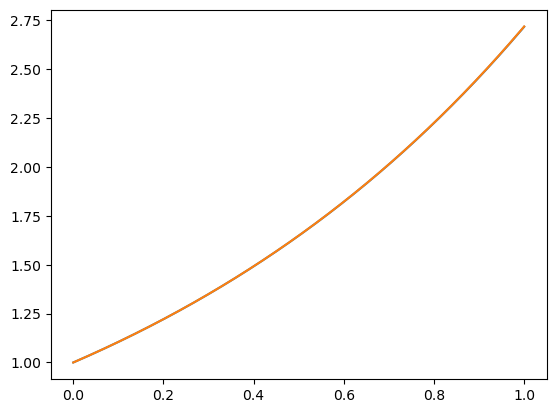

In [22]:
plt.plot(t, y_solve)
plt.plot(t, y)

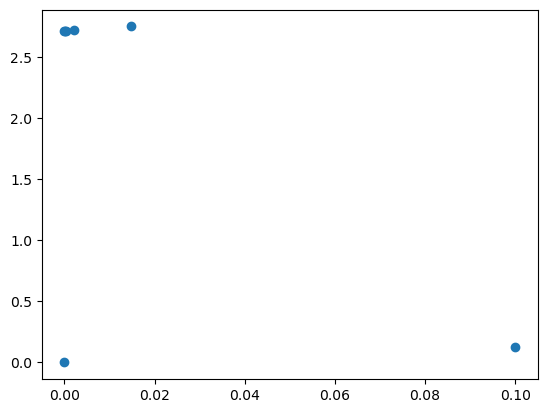

In [31]:
h_values = np.logspace(-6, -1,7)

error = np.zeros_like(h_values)

for i, h in enumerate(h_values):
    t, y_solve = euler(edo,x0, y0, xf, h)
    error[i] = max(np.abs(y_solve - y_exact(t)))

    
plt.scatter(h_values, error)  

In [11]:
import sympy as sp


In [15]:
t = sp.symbols('t')

y = sp.Function('y')

ec = sp.Eq(sp.diff(y(t),t) - y(t),0)
sol_ec = sp.dsolve(ec)
display(sol_ec)

Eq(y(t), C1*exp(t))

## $Ecuaciones$ $De$ $Segundo$ $Orden$

In [34]:
def euler_segundo_orden(f, x0, y0, yp0, xf, h):
    '''
    Soluciona una ecuacion diferencial usando}
    el metodo de euler

    entradas: f funcion callable
    x0 limite inferior
    y0 condicion inicial
    yp0 condicion inicial float
    xf limite superior
    h tamaño de paso

    Salida
    Nodos array
    yn solicion de la edo para y array 
    ypn solucion de la edo para y'
    '''
    n = int(abs(xf - x0)/h) #numero de nodos
    xn = np.zeros(n+1)
    yn = np.zeros_like(xn, dtype = float)#Soluciones para yn
    ypn = np.zeros_like(xn, dtype = float) #Soluciones para yn'
    
    yn[0] = y0#Condicion inicial
    ypn[0] = yp0
    for i in range(n):
        xn[i + 1] = xn[i] +h #Nodos de x+
        yn[i+1] = yn[i] +h * ypn[i] #Solucion para y Edo de primer orden en y1
        ypn[i +1] = ypn[i] + h * f(xn[i], yn[i], ypn[i])# sol para y' edo de primer orden para y2
        
    return xn, yn, ypn

In [35]:
def ocsilador(t, y, yp):
    return -y

In [39]:
t0, tf = 0, 10
y0 = 0
yp0 = 1
h  = 0.001

t, y_sol, v_sol = euler_segundo_orden(ocsilador, t0, y0, yp0,tf ,h)

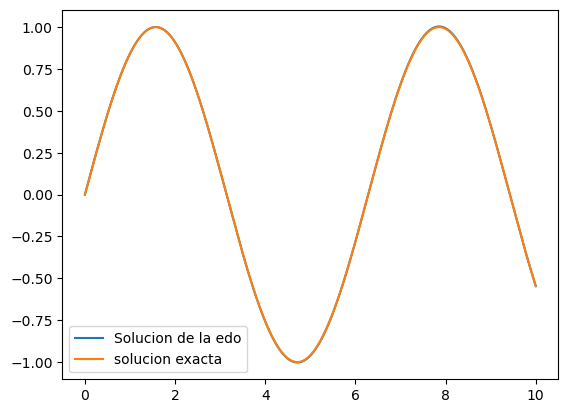

In [41]:
plt.plot(t, y_sol, label = 'Solucion de la edo')
plt.plot(t, np.sin(t), label = 'solucion exacta')
plt.legend()

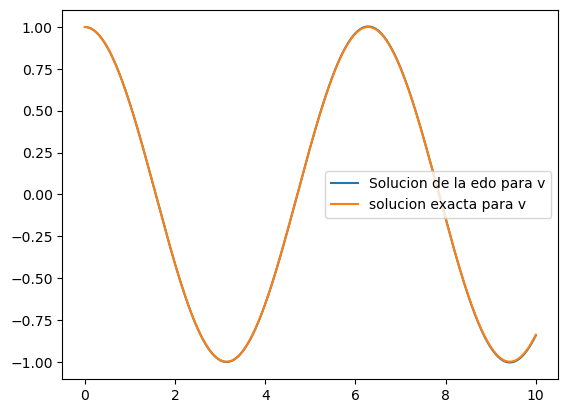

In [42]:
plt.plot(t, v_sol, label = 'Solucion de la edo para v')
plt.plot(t, np.cos(t), label = 'solucion exacta para v')
plt.legend()

## $Para$ $ecuaciones$ $de$ $grado$ $n$

In [30]:
def Euler_de_orden_superior(f, t0, tf, Y0, h):
    n = int((tf - t0)/ h)
    tn = np.zeros(n+1)
    m = len(Y0)
    Yn = np.zeros((m, n + 1))
    #condiciones iniciales
    tn[0] = t0
    Yn[:, 0] = Y0 #Array con las condiciones iniciales

    for k in range(n):
        tn[k +1] = tn[k] +h
        Yn[:, k +1] = Yn[:, k] + h* f(tn[k] , Yn[:, k])
    return tn, Yn

In [6]:
def f(t, Y):
    dYdt = np.zeros_like(Y, dtype = float)
    dYdt[0] = Y[1]
    dYdt[1] = -4* Y[0]
    return dYdt
    

In [12]:
t0, tf = 0., 10.
Y0 = np.array([0., 1.])
h = 0.0001
tn, Yn = Euler_de_orden_superior(f, t0, tf, Y0, h)

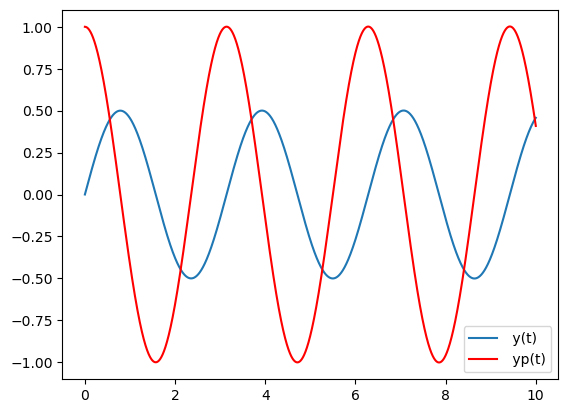

In [16]:
plt.plot(tn, Yn[0], label = ' y(t)')
plt.plot(tn, Yn[1], 'r-',label = ' yp(t)')
plt.legend()
plt.show()

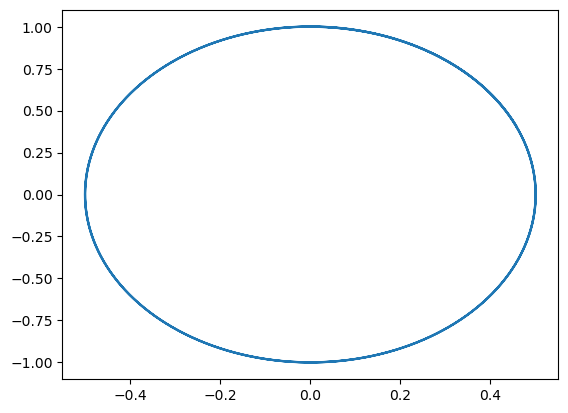

In [17]:
plt.plot(Yn[0], Yn[1]) #Diagrama de fase

In [59]:
def f(t, Y):
    dYdt = np.zeros_like(Y, dtype = float)
    n = len(Y)
    for i in range(n-1):
        dYdt[i] = Y[i+1]
    dYdt[-1] = 2*np.cos(t) - 0.5* Y[2] - 4*Y[1] -0.3* Y[0]
    return dYdt

In [60]:
t0, tf = 0., 10.
Y0 = np.array([0., 0.,0.])
h = 0.1
tn_1, Yn_1 = Euler_de_orden_superior(f, t0, tf, Y0, h)

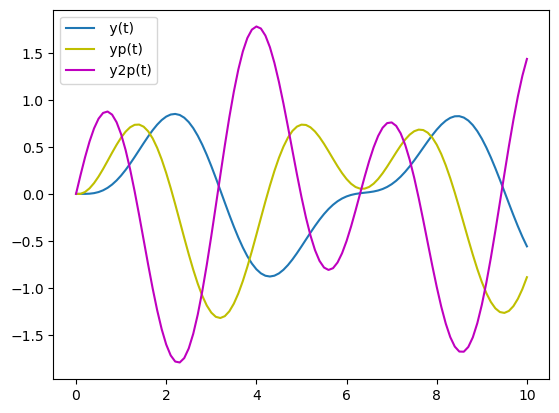

In [61]:
plt.plot(tn_1, Yn_1[0], label = ' y(t)')
plt.plot(tn_1, Yn_1[1], 'y-',label = ' yp(t)')
plt.plot(tn_1, Yn_1[2], 'm-',label = ' y2p(t)')
plt.legend()
plt.show()

## $Metodo$ $de$ $Runge$ $Cuta$

### $Punto$ $medio$

In [62]:
def Runge_cuta_punto_medio(f, t0, tf, Y0, h):
    n = int((tf - t0)/ h)
    tn = np.zeros(n+1)
    m = len(Y0)
    Yn = np.zeros((m, n + 1))
    #condiciones iniciales
    tn[0] = t0
    Yn[:, 0] = Y0 #Array con las condiciones iniciales

    for k in range(n):
        tn[k +1] = tn[k] +h
        k1 = f(tn[k] , Yn[:, k])
        k2 = f(tn[k] + h/2, Yn[:, k] + h/2 *k1)
        Yn[:, k +1] = Yn[:, k] + h* k2  
    return tn, Yn

In [63]:
t0, tf = 0., 10.
Y0 = np.array([0., 0.,0.])
h = 0.1
tn, Yn = Runge_cuta_punto_medio(f, t0, tf, Y0, h)

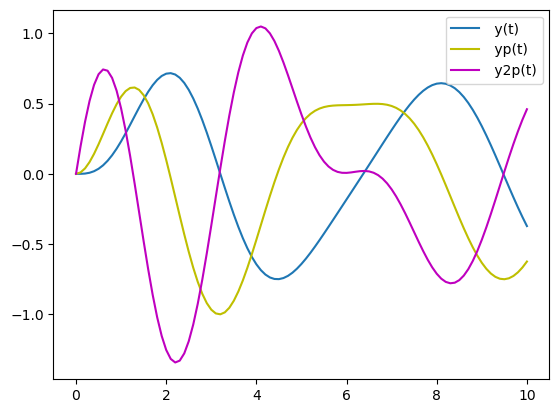

In [64]:
plt.plot(tn, Yn[0], label = ' y(t)')
plt.plot(tn, Yn[1], 'y-',label = ' yp(t)')
plt.plot(tn, Yn[2], 'm-',label = ' y2p(t)')
plt.legend()
plt.show()

In [69]:
def f(t, Y):
    dYdt = np.zeros_like(Y, dtype = float)
    dYdt[0] = Y[1]
    dYdt[1] = -4* Y[0]
    return dYdt
t0, tf = 0., 10.
Y0 = np.array([0., 1.])
h = 0.1
tn, Yn = Euler_de_orden_superior(f, t0, tf, Y0, h)
tn1, Yn1 = Runge_cuta_punto_medio(f, t0, tf, Y0, h)

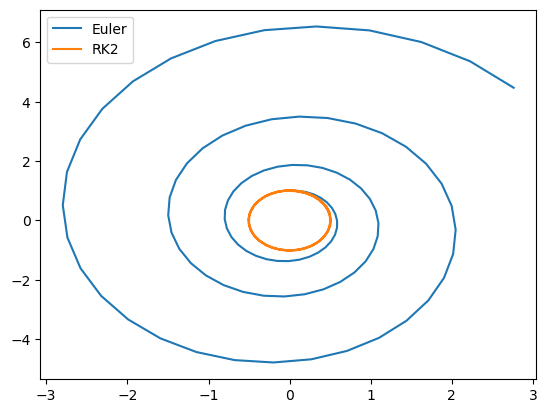

In [71]:
plt.plot(Yn[0], Yn[1], label = 'Euler') #Diagrama de fase euler
plt.plot(Yn1[0], Yn1[1], label = 'RK2') #Diagrama de fase Runge kUta
plt.legend()
plt.show()

### $Runge$ $Kuta$ $de$ $Orden$ $4$

In [14]:
def RK4(f, t0, tf, Y0, h):
    '''
    Resuelve Edo usando RK4
    Entradas:
        f: funcion callable
        t0: tf intervalo float
        Y0: condiciones iniciales array
    Salidas
        tn Vector de tiempo con paso h
        Yn Matriz con las soluciones de Y array
    '''
    n = int((tf - t0)/h) #Numero des pasos nodos
    tn = np.zeros(n +1 , dtype = float) 
    m = len(Y0) #Numero de filas u orden de laEDO
    Yn = np.zeros((m, n+1), dtype = float) #Matriz de soluciones
    #condiciones iniciales
    tn[0] = t0
    Yn[:, 0] = Y0

    for k in range(n):
        tk = tn[k]
        Yk = Yn[:, k]
        k1 = f(tk, Yk)
        k2 = f(tk + h/2, Yk + h/2 * k1)
        k3 = f(tk + h/2, Yk + h/2 * k2)
        k4 = f(tk + h, Yk + h*k3)

        Yn[:, k + 1] = Yk + h/6 * (k1 +2*k2 + 2*k3 + k4)
        tn[k+1] = tk + h
    return tn, Yn
    

In [28]:
# dy/dt = y -> f(t,y) = y

def f(t, y):
    return y

t0, tf = 0., 5.
Y0 = np.array([1.]) 
h = 0.4

t, y = RK4(f, t0, tf, Y0, h)

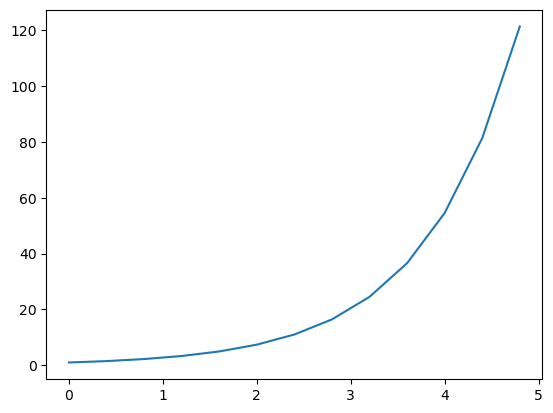

In [29]:
plt.plot(t, y[0])

In [34]:
def f(t, Y):
    dYdt = np.zeros_like(Y, dtype = float)
    dYdt[0] = Y[1]
    dYdt[1] = -4* Y[0]
    return dYdt
t0, tf = 0., 10.
Y0 = np.array([0., 1.])
h = 0.1
tn, Yn = RK4(f, t0, tf, Y0, h)
tn_1, Yn_1 = Euler_de_orden_superior(f, t0, tf, Y0, h)

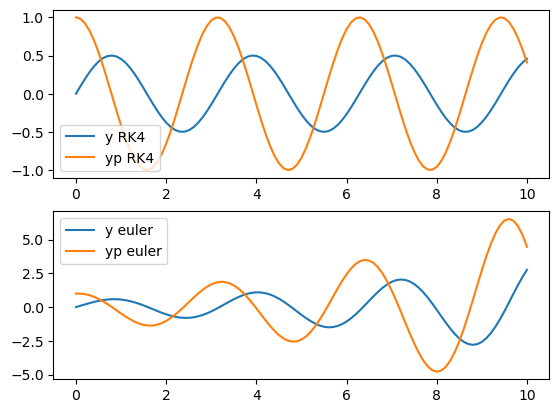

In [38]:

plt.subplot(2,1,1)
plt.plot(tn , Yn[0], label = 'y RK4')
plt.plot(tn , Yn[1], label = 'yp RK4')
plt.legend()
plt.subplot(2,1,2)
plt.plot(tn_1 , Yn_1[0], label = 'y euler')
plt.plot(tn_1 , Yn_1[1], label = 'yp euler')
plt.legend()
plt.show()


## $Usando$ $SCIPY$

In [39]:
from scipy.integrate import solve_ivp

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [41]:
# dy/dt = y

def f(t, y):
    return y
h = 0.2
sol = solve_ivp(f, t_span = (0, 5) , y0 = [1], t_eval = np.arange(0, 5+h, h))

In [42]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-01 ...  4.800e+00  5.000e+00]
        y: [[ 1.000e+00  1.221e+00 ...  1.215e+02  1.484e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0

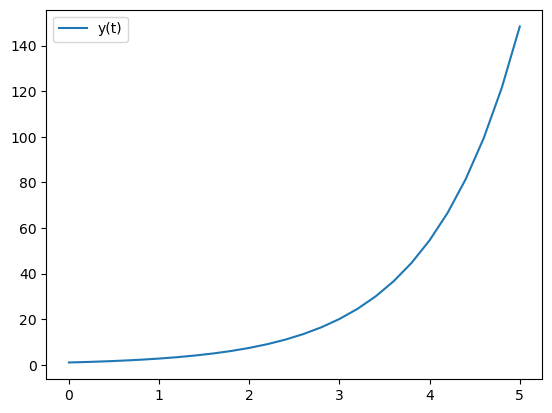

In [44]:
plt.plot(sol.t, sol.y[0], label  = 'y(t)')
plt.legend()

In [47]:
def f(t,y):
    y1, y2 = y
    dy1 = y2
    dy2 = -4 * y1
    return np.array([dy1, dy2])
    

In [52]:
t_span = (0,10)
Y0 = [1. ,0.]
t_evals = np.linspace(0, 10, 100)

solucion = solve_ivp(f, t_span, Y0, t_eval = t_evals)

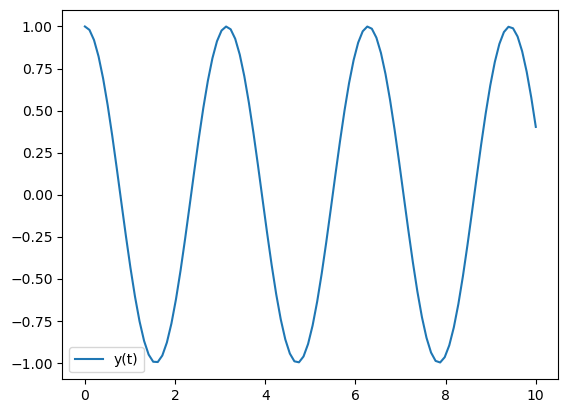

In [53]:
plt.plot(solucion.t, solucion.y[0], label  = 'y(t)')
plt.legend()